In [7]:
import pandas as pd

train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인train.csv') # train 데이터 가져옴
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인test.csv')

In [8]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [9]:
train.isnull().sum() # 결측치 없음

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [10]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [11]:
train.value_counts('quality')

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
dtype: int64

In [8]:
# !pip install matplotlib

In [9]:
# !pip uninstall matplotlib

In [1]:
import ydata_profiling
profile = train.profile_report()
profile

ModuleNotFoundError: No module named 'ydata_profiling'

In [4]:
!pip install klib # 전처리 및 프로파일링 라이브러리

In [2]:
import warnings

# hide warnings
warnings.filterwarnings("ignore") # 모든 경고를 무시

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

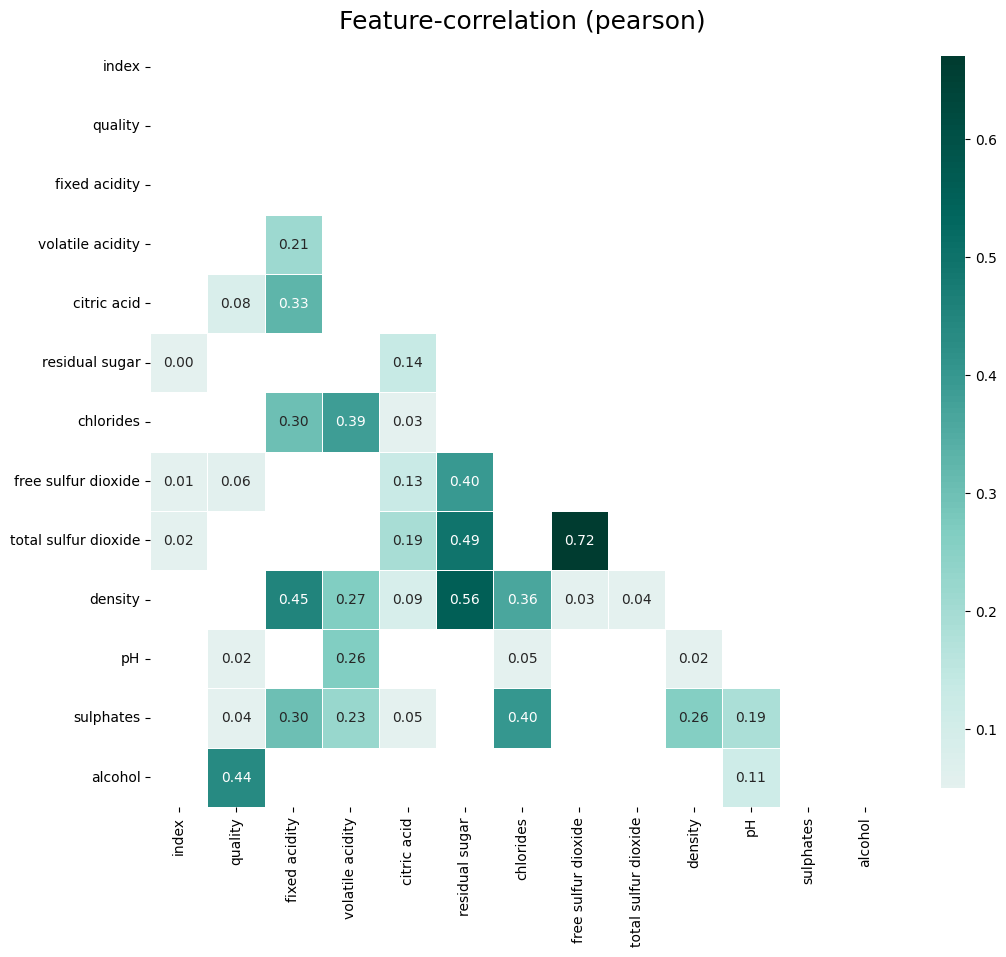

In [12]:
import klib
klib.corr_plot(train, split='pos') # 양의 상관관계 출력

In [ ]:
#음의 상관관계
klib.corr_plot(train, split='neg')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18,8)) # 생성될 그래프의 크기를 가로 18인치, 세로 8인치로 설정
corr= train.corr() # 모든 변수 간의 상관관계를 계산
sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0) #  annot=True는 각 셀에 상관계수 값을 표시하라는 의미/ square=정사각형으로할건지/ vmin, vmax=색상범위

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')

In [ ]:
ss = StandardScaler() # 표준화하는 라이브러리 /평균 0, 표준편차 1
train[numerical_columns] = ss.fit_transform(train[numerical_columns]) # numerical_columns=표준화가능컬럼

train['type'] = pd.factorize(train['type'])[0] # factorize하면 튜플형태로 인코딩값,원래값 이 반환되어서 인코딩값으로 변환함.

In [ ]:
train.head(3)